<a href="https://colab.research.google.com/github/A01793146/demodatabricks/blob/main/Equipo7_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Integrador
## Tecnológico de Monterrey
### Maestría en Inteligencia Artificial Aplicada (MNA)
#### Avance 1
#### Equipo 7
* Jorge Arturo Federico Rivera – A01250724
* Marco Antonio Vázquez Morales – A01793704
* Alejandro Jesús Vázquez Navarro - A01793146

Proyecto:

*Modelo clasificador de multimorbilidad maternal y predictor de desenlaces perinatales a partir de datos clínicos metabólicos, genéticos y nutricionales de mujeres mexicanas*

05 de mayo de 2024

# Introducción


### Este trabajo tiene como finalidad crear un modelo que pueda predecir el riesgo de sufrir alguna afectación a la mujer o su feto en el proceso de embarazo, tomando como base los datos clínicos, metabólicos, genéticos y nutricionales. Se trata de encontrar una variable dependiente que permita detectar las emfermedades a tiempo para poder reducir el impacto negativo que puediera tener en uno o ambos casos.

### En primer termino se enlistan las variabales que se van a utilizar, en esta étapa identificamos 99 en donde las que estan en color naranja representan las posibles variables dependendientes, las que estan en azul son las variables explicativas, las que estan en color rojo serían las variables de salida.

### Posteriormente realizamos una revisión a los datos, luego quitamos las columnas que no serán útiles para después realizar un análisis exploratorio de los datos utilizando ydata-profilling y Sweetviz.

### Debido al número extenso de variables (96) generamos reportes estáticos en html para su mejor visualización.

### Estos pueden consultarse en estas ligas:
- [Reporte mínimo exploratorio](https://github.com/jafr0822/MNA_ProyectoIntegrador-Equipo7/blob/8a9e4300831ede90791258bd5b58acd44c456537/data/reports/profile1_min_report.html)

- [Reporte completo exploratorio](https://github.com/jafr0822/MNA_ProyectoIntegrador-Equipo7/blob/8a9e4300831ede90791258bd5b58acd44c456537/data/reports/profile1_exp_report.html)

- [Reporte realizado con sweetViz](https://github.com/jafr0822/MNA_ProyectoIntegrador-Equipo7/blob/8a9e4300831ede90791258bd5b58acd44c456537/data/reports/sv_report1.html)


# Estructura de datos

Despúes de una revisión con la parte médica, definimos las siguientes variables como la estrucutura base para la generación de los modelos predicitivos.
A continuación se listan y describen las variables que serán utilizadas para este proyecto.

Las variables en rojo serán consolidadas en una sola variable llamada `morbilidad`

La variable dependiente (en marrón) es `sdg_parto`:

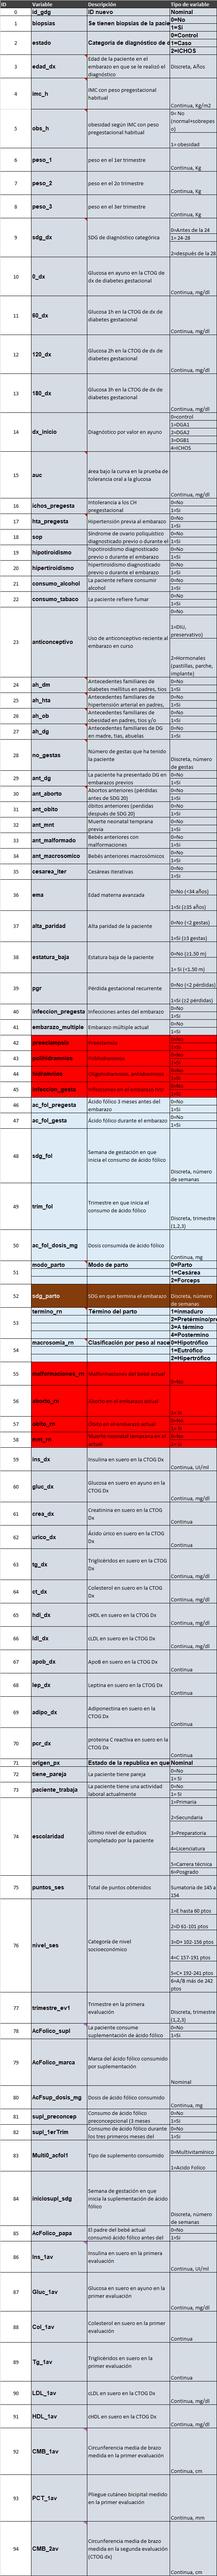


### Install libraries for Colab

In [2]:
#%pip install matplotlib-venn missingno sweetviz ydata-profiling
#%pip install --upgrade Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=4802530bbd25024bb285ab4f8fdccd566f23deb046b6aee532f56267aa6099b6
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.7 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resol

### Import libraries

In [1]:
import pandas as pd
import sweetviz as sv
import numpy as np
from ydata_profiling import ProfileReport

### Read data from Excel databases

#### base_multimorb_fase1_fase_2_clinicas_originales.xlsx

In [12]:
# Se agrega esta configuración para mostrar todas las variables en el método describe.().T
pd.options.display.max_columns = None


cols_to_include = [
    "id_gdg",
"biopsias",
"estado",
"edad_dx",
"imc_h",
"obs_h",
"peso_1",
"peso_2",
"peso_3",
"sdg_dx",
"gluc_dx_0",
"gluc_dx_60",
"gluc_dx_120",
"gluc_dx_180",
"dx_inicio",
"auc",
"ichos_pregesta",
"hta_pregesta",
"sop",
"hipotiroidismo",
"hipertiroidismo",
"consumo_alcohol",
"consumo_tabaco",
"anticonceptivo",
"ah_dm",
"ah_hta",
"ah_ob",
"ah_dg",
"no_gestas",
"ant_dg",
"ant_aborto",
"ant_obito",
"ant_mnt",
"ant_malformado",
"ant_macrosomico",
"cesarea_iter",
"ema",
"alta_paridad",
"estatura_baja",
"pgr",
"infeccion_pregesta",
"embarazo_multiple",
"preeclampsia",
"polihidramnios",
"hidramnios",
"infeccion_gesta",
"ac_fol_pregesta",
"ac_fol_gesta",
"sdg_fol",
"trim_fol",
"ac_fol_dosis_mg",
"modo_parto",
"sdg_parto",
"termino_rn",
"macrosomia_rn",
"malformaciones_rn",
"aborto_rn",
"obito_rn",
"mnt_rn",
"ins_dx",
"gluc_dx",
"crea_dx",
"urico_dx",
"tg_dx",
"ct_dx",
"hdl_dx",
"ldl_dx",
"apob_dx",
"lep_dx",
"adipo_dx",
"pcr_dx",
"origen_px",
"tiene_pareja",
"paciente_trabaja",
"escolaridad",
"puntos_ses",
"nivel_ses",
"trimestre_ev1",
"AcFolico_supl",
"AcFolico_marca",
"AcFsup_dosis_mg",
"supl_preconcep",
"supl_1erTrim",
"Multi0_acfol1",
"iniciosupl_sdg",
"AcFolico_papa",
"Ins_1av",
"Gluc_1av",
"Col_1av",
"Tg_1av",
"LDL_1av",
"HDL_1av",
"CMB_1av",
"PCT_1av",
"CMB_2av",
"PCT_2av"


]

excel_file_1 = "data/base_multimorb_fase1_fase_2_clinicas_originales.xlsx"

df1_sheet1 = pd.read_excel(
    excel_file_1,
    sheet_name=0,
    usecols=cols_to_include,
)

df1_sheet2 = pd.read_excel(
    excel_file_1,
    sheet_name=1,
    usecols=cols_to_include,
)

df1_sheets = [
    df1_sheet1,
    df1_sheet2
]

df1 = pd.concat(df1_sheets)

#df1.describe()

df1.describe(include="all").T

count unique      top freq       mean        std        min  \
id_gdg      1188   1183  DG09D28    2        NaN        NaN        NaN   
biopsias  1228.0    NaN      NaN  NaN   0.084691   0.278534        0.0   
estado    1250.0    NaN      NaN  NaN     0.5808   0.644208        0.0   
edad_dx   1314.0    NaN      NaN  NaN  30.909437   6.832353       15.0   
imc_h     1225.0    NaN      NaN  NaN  26.322959   5.137912  16.560653   
...          ...    ...      ...  ...        ...        ...        ...   
HDL_1av    208.0    NaN      NaN  NaN  60.486538  18.224425       31.0   
CMB_1av    211.0    NaN      NaN  NaN  29.089573   4.041969       21.0   
PCT_1av    213.0   59.0     29.0  9.0        NaN        NaN        NaN   
CMB_2av    154.0    NaN      NaN  NaN  28.700325   4.155021        3.5   
PCT_2av    154.0    NaN      NaN  NaN  26.356818   6.387703        7.5   

                25%       50%     75%        max  
id_gdg          NaN       NaN     NaN        NaN  
biopsias        0.0       0.0     0.0        1.0  
estado          0.0       0.0     1.0        2.0  
edad_dx        26.0      32.0    36.0       48.0  
imc_h     22.826881  25.47666  28.959  60.595568  
...             ...       ...     ...        ...  
HDL_1av        48.0      57.0   69.25      137.0  
CMB_1av        26.4      28.7    31.5       48.8  
PCT_1av         NaN       NaN     NaN        NaN  
CMB_2av        26.5      29.0    31.0       39.0  
PCT_2av        22.5      26.5    30.5       48.5  

[96 rows x 11 columns]

In [13]:
df1.head(10)

id_gdg  biopsias  estado  edad_dx      imc_h  obs_h  peso_1  peso_2  \
0  DG37D44       0.0     1.0     32.0  21.755469    0.0     NaN     NaN   
1  DG28M97       0.0     1.0     39.0  26.666667    0.0     NaN     NaN   
2  DG73R77       0.0     1.0     37.0  32.791945    1.0     NaN     NaN   
3  DG63E13       0.0     1.0     28.0  18.730489    0.0     NaN     NaN   
4  DG61O38       0.0     1.0     40.0  34.131113    1.0     NaN     NaN   
5  DG58D33       0.0     1.0     37.0  28.228386    0.0     NaN     NaN   
6  DG59K63       0.0     1.0     40.0  29.744200    0.0     NaN     NaN   
7  DG07U01       0.0     1.0     39.0  26.314635    0.0     NaN     NaN   
8  DG15W71       0.0     1.0     26.0  21.490286    0.0     NaN     NaN   
9  DG70J30       0.0     1.0     34.0  29.296875    0.0     NaN     NaN   

   peso_3 sdg_dx  gluc_dx_0  gluc_dx_60  gluc_dx_120  gluc_dx_180  dx_inicio  \
0     NaN    2.0       85.0       193.0        158.0        132.0        1.0   
1     NaN    1.0       77.0       205.0        223.0        189.0        1.0   
2     NaN    0.0      113.0       207.0        209.0        179.0        2.0   
3     NaN    0.0      105.0       199.0        161.0        139.0        2.0   
4     NaN    0.0       99.0       209.0        186.0        135.0        1.0   
5     NaN    0.0       97.0       190.0        176.0        132.0        1.0   
6     NaN    2.0       94.0       180.0        223.0        115.0        1.0   
7     NaN    1.0       82.0       192.0        152.0        140.0        1.0   
8     NaN    2.0       84.0       169.0        179.0        141.0        1.0   
9     NaN    2.0      110.0       246.0        239.0         90.0        2.0   

       auc  ichos_pregesta  hta_pregesta  sop  hipotiroidismo  \
0  27570.0             NaN           NaN  NaN             NaN   
1  33660.0             NaN           1.0  NaN             NaN   
2  33720.0             NaN           1.0  NaN             NaN   
3  28920.0             NaN           1.0  NaN             NaN   
4  30720.0             NaN           1.0  NaN             NaN   
5  28830.0             NaN           1.0  NaN             NaN   
6  30450.0             NaN           1.0  NaN             NaN   
7  27300.0             NaN           1.0  NaN             NaN   
8  27630.0             NaN           1.0  NaN             NaN   
9  35100.0             NaN           1.0  NaN             NaN   

   hipertiroidismo  consumo_alcohol  consumo_tabaco  anticonceptivo  ah_dm  \
0              NaN              NaN             NaN             NaN    NaN   
1              NaN              NaN             NaN             NaN    1.0   
2              NaN              NaN             NaN             NaN    1.0   
3              NaN              NaN             NaN             NaN    1.0   
4              NaN              NaN             NaN             NaN    0.0   
5              NaN              NaN             NaN             NaN    1.0   
6              NaN              NaN             NaN             NaN    0.0   
7              NaN              NaN             NaN             NaN    1.0   
8              NaN              NaN             NaN             NaN    1.0   
9              NaN              NaN             NaN             NaN    1.0   

   ah_hta  ah_ob  ah_dg  no_gestas  ant_dg  ant_aborto  ant_obito  ant_mnt  \
0     NaN    NaN    NaN        3.0     NaN         0.0        0.0      0.0   
1     1.0    0.0    0.0        2.0     NaN         0.0        0.0      0.0   
2     1.0    0.0    0.0        2.0     NaN         0.0        0.0      0.0   
3     1.0    0.0    0.0        2.0     NaN         0.0        0.0      0.0   
4     1.0    0.0    0.0        4.0     NaN         1.0        0.0      0.0   
5     1.0    0.0    0.0        3.0     NaN         0.0        0.0      0.0   
6     1.0    0.0    0.0        2.0     NaN         0.0        0.0      0.0   
7     0.0    0.0    0.0        1.0     0.0         0.0        0.0      0.0   
8     1.0    0.0    

In [14]:
df1.tail(10)

id_gdg  biopsias  estado  edad_dx      imc_h  obs_h  peso_1  peso_2  \
172    NaN       NaN     NaN     26.0  25.990903    0.0    80.0     NaN   
173    NaN       NaN     NaN     39.0  28.040378    0.0    71.7     NaN   
174    NaN       NaN     0.0     32.0  22.862369    0.0    61.7    64.8   
175    NaN       NaN     NaN     37.0  23.507805    0.0    67.1     NaN   
176    NaN       NaN     NaN     30.0  30.083829    1.0    92.2     NaN   
177    NaN       NaN     NaN     25.0  19.735976    0.0    44.5    51.8   
178    NaN       NaN     NaN     33.0  32.873110    1.0    72.9     NaN   
179    NaN       NaN     0.0     26.0  25.476660    0.0    62.7     NaN   
180    NaN       NaN     0.0     15.0  18.750000    0.0     NaN    50.0   
181    NaN       NaN     NaN     21.0  18.253110    0.0    57.0     NaN   

     peso_3 sdg_dx  gluc_dx_0  gluc_dx_60  gluc_dx_120  gluc_dx_180  \
172     NaN    NaN        NaN         NaN          NaN          NaN   
173     NaN    NaN        NaN         NaN          NaN          NaN   
174     NaN    NaN        NaN         NaN          NaN          NaN   
175     NaN    NaN        NaN         NaN          NaN          NaN   
176     NaN    NaN        NaN         NaN          NaN          NaN   
177     NaN    NaN        NaN         NaN          NaN          NaN   
178     NaN    NaN        NaN         NaN          NaN          NaN   
179     NaN      0       91.0        76.0         82.0          NaN   
180     NaN    NaN        NaN         NaN          NaN          NaN   
181     NaN    NaN        NaN         NaN          NaN          NaN   

     dx_inicio  auc  ichos_pregesta  hta_pregesta  sop  hipotiroidismo  \
172        NaN  NaN             0.0           0.0  0.0             0.0   
173        NaN  NaN             1.0           0.0  0.0             1.0   
174        NaN  NaN             0.0           0.0  0.0             0.0   
175        NaN  NaN             0.0           0.0  0.0             0.0   
176        NaN  NaN             0.0           0.0  0.0             0.0   
177        NaN  NaN             0.0           0.0  0.0             0.0   
178        NaN  NaN             0.0           0.0  0.0             0.0   
179        0.0  NaN             0.0           0.0  0.0             0.0   
180        NaN  0.0             0.0           0.0  0.0             0.0   
181        NaN  0.0             0.0           0.0  0.0             0.0   

     hipertiroidismo  consumo_alcohol  consumo_tabaco  anticonceptivo  ah_dm  \
172              0.0              0.0             0.0             0.0    0.0   
173              0.0              0.0             0.0             1.0    1.0   
174              0.0              0.0             0.0             0.0    0.0   
175              0.0              0.0             0.0             0.0    1.0   
176              0.0              0.0             0.0             0.0    1.0   
177              0.0              0.0             1.0             2.0    1.0   
178              0.0              1.0             0.0             0.0    1.0   
179              1.0              0.0             0.0             0.0    1.0   
180              0.0              0.0             0.0             1.0    0.0   
181              0.0              0.0             1.0             1.0    1.0   

     ah_hta  ah_ob  ah_dg  no_gestas  ant_dg  ant_aborto  ant_obito  ant_mnt  \
172     0.0    0.0    0.0        1.0     0.0         0.0        0.0      0.0   
173     1.0    0.0    0.0        2.0     0.0         0.0        0.0      0.0   
174     0.0    0.0    0.0        1.0     0.0         0.0        0.0      0.0   
175     1.0    0.0    0.0        3.0     0.0         0.0        0.0      0.0   
176     1.0    1.0    0.0        4.0     0.0         1.0        0.0      0.0   
177     1.0    1.0    0.0        1.0     0.0         0.0        0.0      0.0   
178     0.0    0.0    0.0        4.0     0.0         1.0        0.0      0.0   
179     1.0    0.0    0.0        3.0     0.0         1.0    

#### ydata-profiling

##### Generación de análisis univariado y bi/multivariado

In [15]:
profile1 = ProfileReport(
    df1,
    title="Minimal Profiling Report for df1",
    # explorative=True,
    minimal=True,
)
profile1.to_file("data/reports/profile1_min_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
profile1.to_notebook_iframe()

### Debido al tamaño del reporte, se prefirió generar un archivo html llamado  profile1_exp_report.html que está alojado en el repositorio o puede ser consultado en la siguiente liga [EDA_Extensivo](/content/data/reports/profile1_min_report.html):

In [17]:
profile1_exp = ProfileReport(
    df1,
    title="Explorative Profiling Report for df1",
    explorative=True,
    # minimal=True,
)
profile1_exp.to_file("data/reports/profile1_min_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'cannot reindex on an axis with duplicate labels')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##### sweetviz

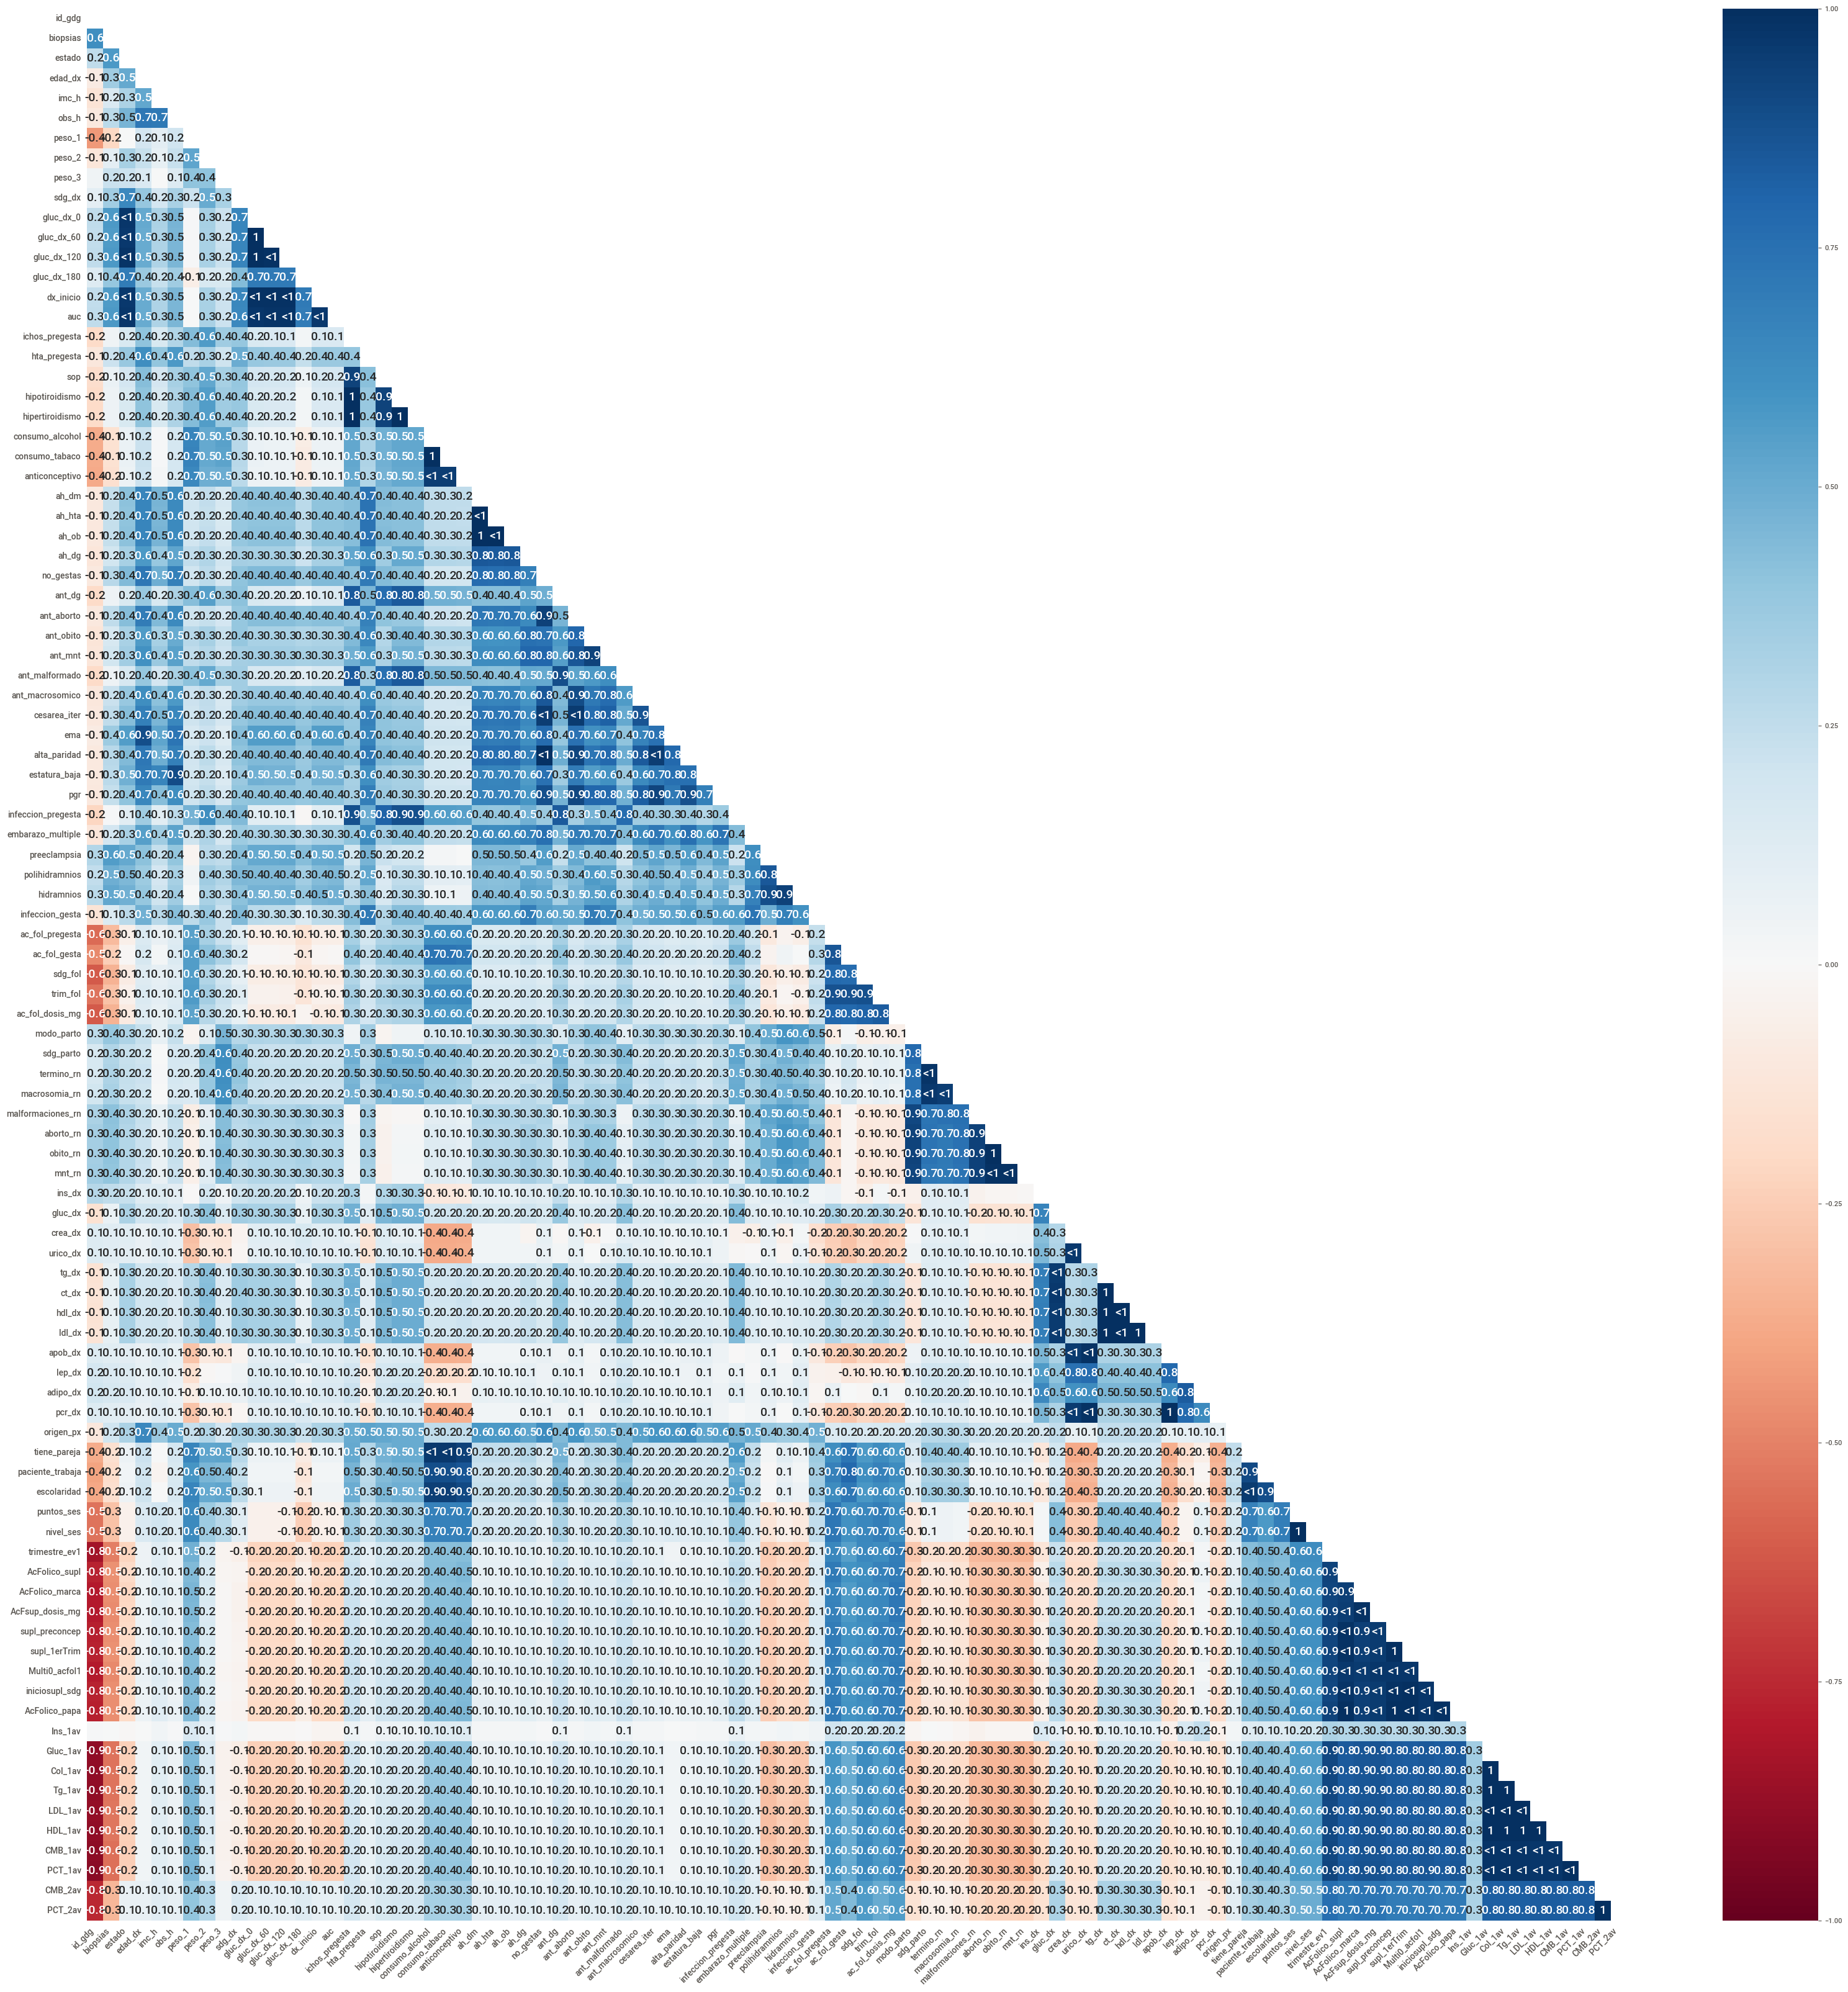

In [19]:
# Missingness Map

import missingno as msno
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40, 40))  # Adjust size as needed

# Create the heatmap
msno.heatmap(df1, ax=ax)

# Reduce font size of tick labels (optional)
ax.tick_params(axis='both', which='major', labelsize=10)  # Adjust size as needed

plt.show()

Esta gráfica nos permite identificar zonas de alta correlación con presencia y ausencia de variables.

Por ejemplo, la zona de variables ac_fol_pregesta, ac_fol_gesta, sdg_fol, trim_fol y ac_fol_dosis_mg tiene una ligera correlación positiva en presencia de biopsias.

Misma conducta podemos observarla con las variables trimestre_ev1, acFolico_supl, AcFolico_Marca, AcFsup_dosis_mg, supl_preconcep, supl_1erTrim, Multi0_acfol1, inicisupl_sdg, AcFolico_papa, Gluc_1av, Col_1av, Tg_1av, LDL_1av, HDL_1av, CMB_1av, PCT_1av.

También encontramos correlaciones positivas en presencia de datos con las siguientes pares de variables:

[trimestre_ev1, acFolico_supl, AcFolico_Marca, AcFsup_dosis_mg, supl_preconcep, supl_1erTrim, Multi0_acfol1, inicisupl_sdg, AcFolico_papa, Gluc_1av, Col_1av, Tg_1av, LDL_1av, HDL_1av, CMB_1av, PCT_1av]

<center>vs</center>

[modo_parto, sdg_parto, termino_rn (candidata a variable dependiente), macromosima_rn (candidata a variable dependiente), malformaciones_rn, aborto_rn, obito_rn, mnt_rn, ins_dx, crea_dx, urico_dx, aprob_dx, lep_dx, pcr_dx]

Estos últimos siendo parte del conjunto de marcadores bioquímicos.


# Dendrograma

Este gráfico proporciona información en forma de árbol generado mediante agrupación jerárquica y agrupa columnas que tienen fuertes correlaciones en nulidad.

Si varias columnas se agrupan en el nivel cero, esto significa que la presencia de nulos en una de esas columnas está directamente relacionada con la presencia o ausencia de nulos en las demás columnas. Cuanto más separadas estén las columnas en el árbol, menos probable será que los valores nulos estén correlacionados entre las columnas.



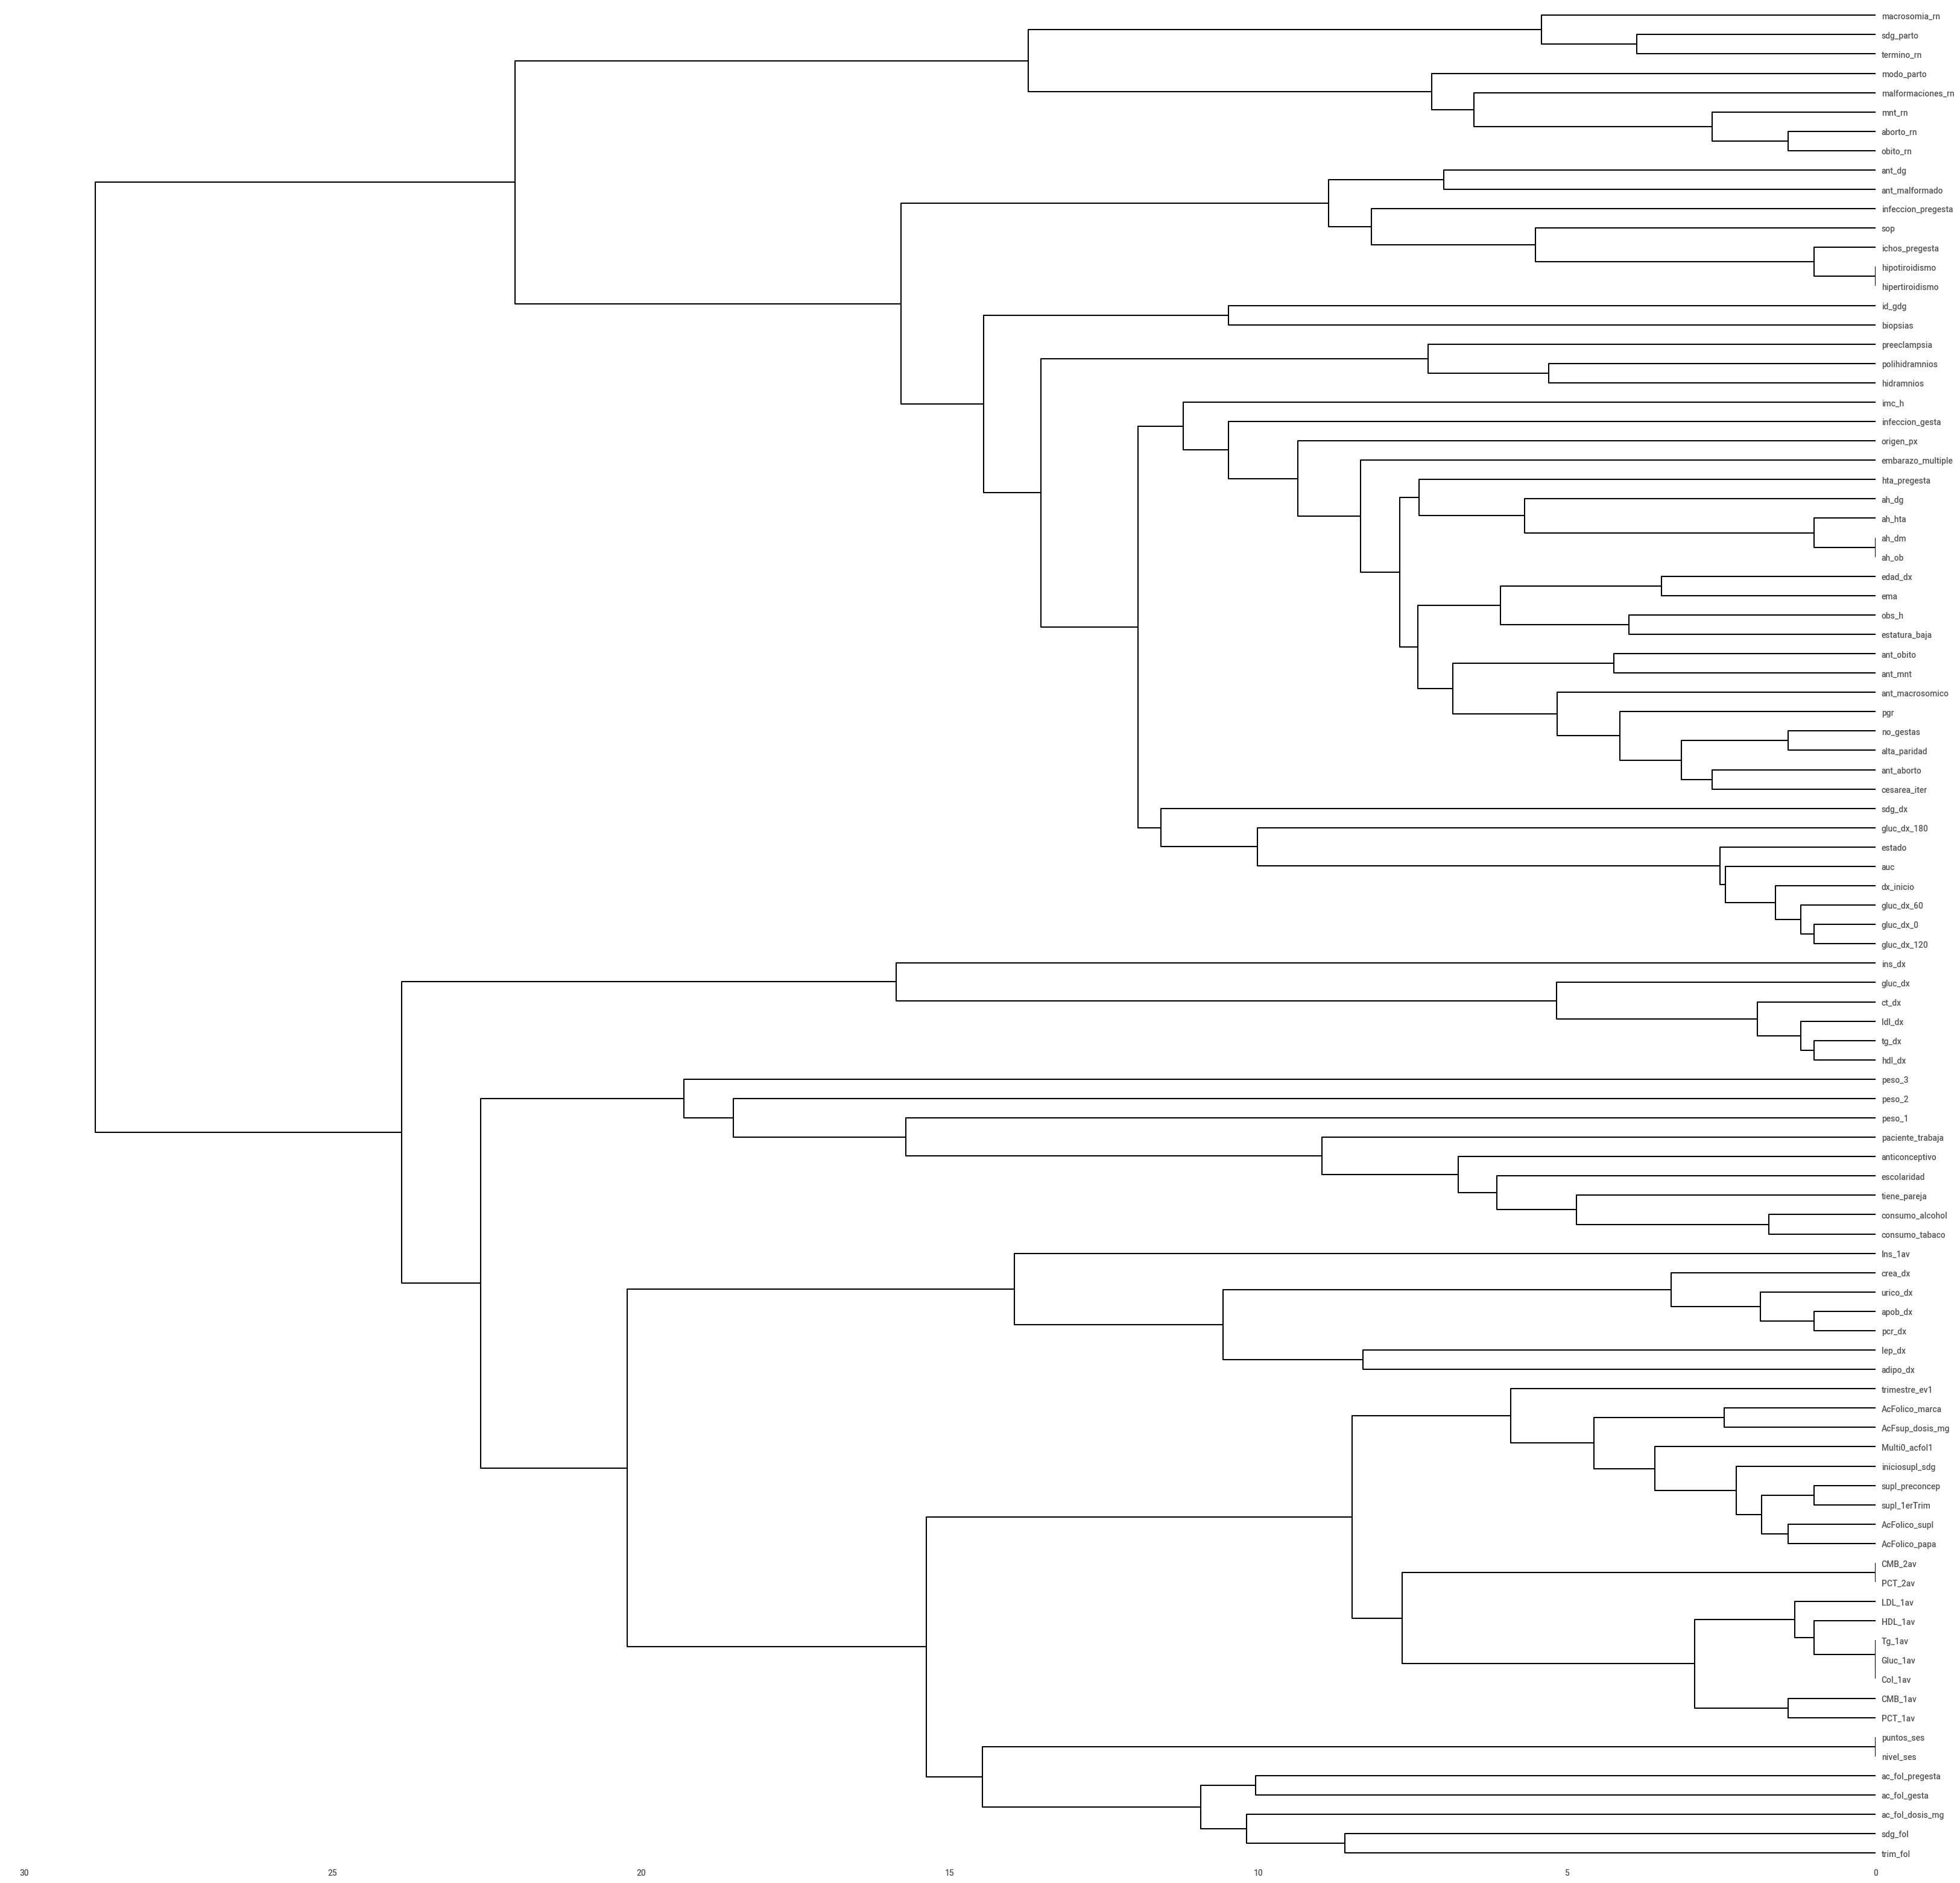

In [20]:
fig, ax = plt.subplots(figsize=(40, 40))

msno.dendrogram(df1, ax=ax)

ax.tick_params(axis='both', which='major', labelsize=10)
plt.show()

Como se mencionó, este gráfico nos permite entender diferentes grupos de columnas que guardan relación con su presencia o no de datos. Por ejemplo, el grupo de preeclampsia, polihidramnios e hidramnios están fuertemente correlacionados en nulidad. La presencia de una variable en este grupo indica que existe una alta probabilidad de la existencia de otra.

Esto es importante porque gracias a esta gráfica podemos determinar grupos de variables y determinar qué técnica de imputación de datos podemos realizar. Es decir, todo lo que esté relacionado con la glucosa, puede ser tratado con la misma técnica de imputación.

Inclusive podemos identificar clusters de columnas a nivel cero como obs_h, talla, estatura_baja, ev_1ertrim, ev_dieta, edad_dx y ema que indican tener una gran densidad de dato.

# Separación de variables numéricas y categóricas

Mediante este código, separaremos las variables numéricas y categóricas para darles el tratamiento indicado.

In [83]:

def get_column_types(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    string_cols = df.select_dtypes(include=[object]).columns.tolist()
    binary_cols = [col for col in df.columns if col not in numeric_cols and col not in string_cols]
    return numeric_cols, string_cols, binary_cols

In [85]:
numeric_cols, string_cols, binary_cols = get_column_types(df1.copy())

print("Numeric Columns:")
print(numeric_cols)

print("\nString Columns:")
print(string_cols)

print("\nBinary Columns:")
print(binary_cols)

Numeric Columns:
['biopsias', 'estado', 'edad_dx', 'imc_h', 'obs_h', 'peso_1', 'peso_2', 'peso_3', 'gluc_dx_0', 'gluc_dx_60', 'gluc_dx_120', 'gluc_dx_180', 'dx_inicio', 'auc', 'ichos_pregesta', 'hta_pregesta', 'sop', 'hipotiroidismo', 'hipertiroidismo', 'consumo_alcohol', 'consumo_tabaco', 'anticonceptivo', 'ah_dm', 'ah_hta', 'ah_ob', 'ah_dg', 'no_gestas', 'ant_dg', 'ant_aborto', 'ant_obito', 'ant_mnt', 'ant_malformado', 'cesarea_iter', 'ema', 'alta_paridad', 'estatura_baja', 'pgr', 'infeccion_pregesta', 'embarazo_multiple', 'preeclampsia', 'polihidramnios', 'hidramnios', 'infeccion_gesta', 'ac_fol_pregesta', 'ac_fol_gesta', 'sdg_fol', 'trim_fol', 'ac_fol_dosis_mg', 'modo_parto', 'sdg_parto', 'termino_rn', 'malformaciones_rn', 'aborto_rn', 'obito_rn', 'mnt_rn', 'ins_dx', 'gluc_dx', 'crea_dx', 'urico_dx', 'tg_dx', 'ct_dx', 'hdl_dx', 'ldl_dx', 'apob_dx', 'lep_dx', 'adipo_dx', 'pcr_dx', 'tiene_pareja', 'paciente_trabaja', 'escolaridad', 'puntos_ses', 'nivel_ses', 'trimestre_ev1', 'AcFolic

In [86]:
# Quitaremos la ID y la variable del estado porque no ofrecen poder predictivo.

dfFinal = df1.drop(['id_gdg', 'origen_px'], axis=1)

# Selección de variable dependiente

En conjunto con el equipo médico, se ha decidido que la variable dependiente será `sdg_parto`, es decir, la semana de gestación del parto.

# Preprocesamiento



Para las variables numéricas utilizaremos los siguientes criterios:

- En la siguiente fase del proyecto, realizaremos un análisis de componentes principales para reducir la multidimensionalidad. Esto nos permitirá reducir el número de componentes para nuestro modelo. Una vez que tengamos una matriz reducida de componentes, aplicaremos técnicas para determinar la naturaleza de los datos faltantes, es decir, si son faltas por MAR (Missing at Random), MCAR (Missing Completely at Random) o MNAR (Missing Not at Random)

- Dependiendo del diagnóstico que realicemos, aplicaremos técnicas de imputación simples (si es MAR),  eliminar completamente los registros (si es MCAR) o correr algoritmos de k-nn (podemos caer en sesgos pero es necesario evaluar)



#### Remover columnas con baja o nula correlación

Con base en una revisión hecha a partir de los reportes, gráficos y estadísticas previamente generados y mostrados o anexos a este notebook, se ha decidido en remover algunas de las columnas proporcionadas en la base de datos.

La principal justificación de la eliminación de estas columnas es su baja o nula correlación contra los _target features_ y por su alto número de valores faltantes (o NaN's) entre sus datos. De esta manera podremos reducir la cantidad de features presentes y será más fácil mantener el enfoque en las variables que serán mas valiosas para el análisis y modelo final.

#### Imputing and Encoding

In [87]:
df1.isna().sum()

id_gdg       182
biopsias     142
estado       120
edad_dx       56
imc_h        145
            ... 
HDL_1av     1162
CMB_1av     1159
PCT_1av     1157
CMB_2av     1216
PCT_2av     1216
Length: 96, dtype: int64

In [89]:
# Import necessary libraries
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Define pipelines for each column type
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

string_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))  # assuming missing values should be treated as 0
])

# Define a column transformer to apply pipelines to specific column types
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_pipeline, numeric_cols),
        ('string', string_pipeline, string_cols),
        ('binary', binary_pipeline, binary_cols)
    ])

# Impute missing values in the DataFrame
df_imputed = preprocessor.fit_transform(df1)
print(df_imputed)


[[0.0 1.0 32.0 ... 'SSA' 0.4 25.5]
 [0.0 1.0 39.0 ... 'SSA' 0.4 25.5]
 [0.0 1.0 37.0 ... 'SSA' 0.4 25.5]
 ...
 [0.08469055374592833 0.0 26.0 ... 'SSA' 5.0 23]
 [0.08469055374592833 0.0 15.0 ... 'SSA' 0.4 22.5]
 [0.08469055374592833 0.5808 21.0 ... 'MATERNA/FERRANINA' 3.8 15.5]]


# Conclusiones

### Después de realizar el análisis exploratorio de los datos tenemos 97 variables de las cuales 56 son categóricas, 40 númericas y 1 de texto.

### No obstante que previamente se habían eliminado algunas columnas, después del EDA, aún tenemos variables que presentan datos faltantes muy altos, que de mantenerlos podrían afectar el resultado del modelo, por lo que realizaremos una evaluación de cada una para ver si es posible realizar un método de imputación o definitivamente las quitamos, esta parte se trabajará con el Hospital toda vez que podríamos estar quitando alguna variable que puede ser relevante desde el punto de vista médico para el objetivo de este trabajo.

### En el sweetviz se puede encontrar marcado en rojo y en amarillo aquellas variables que presentan este tipo de problema. Las que estan en color verde las que estan dentro de un rango permitido.